In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir("C:/User/user/Desktop/traffic")
os.getcwd()

In [2]:
import pandas as pd
file_path = "./data/train.csv"

In [3]:
df = pd.read_csv(file_path)
df.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


# 문제 정의
- 2022년 기준으로 제주도민 인구수가 68만명. 연 평균 1.3% 정도 매년 증가한다.

- 외국인과 관광객 까지 포함하면 제주도에 상주하는 인구가 90만명 가까이 된다고 합니다.

- 제주도민과 외국인, 관광객 증가로 인해 현재 제주도의 교통 체증이 매우 심각하다.

> **데이터 살펴보기**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|id|아이디|
|base_date|날짜|
|day_of_week|요일|
|base_hour|시간대|
|road_in_use|도로사용여부|
|lane_count|차로수|
|road_rating|도로등급|
|multi_linked|중용구간 여부|
|connect_code|연결로 코드|
|maximum_speed_limit|최고속도제한|
|weight_restricted|통과제한하중|
|height_restricted|통과제한높이|
|road_type|도로유형|
|start_latitude|시작지점의 위도|
|start_longitude|시작지점의 경도|
|start_turn_restricted|시작 지점의 회전제한 유무|
|end_latitude|도착지점의 위도|
|end_longitude|도착지점의 경도|
|end_turn_restricted|도작지점의 회전제한 유무|
|road_name|도로명|
|start_node_name|시작지점명|
|end_node_name|도착지점명|
|vehicle_restricted|통과제한차량|
|target|평균속도(km)|

In [4]:
df.shape

(4701217, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

# 문제 해결 프로세스 정의
> 문제 정의
```
제주도는 매년 인구수와 관광객이 증가하여 교통량이 많이 늘어나고 있다.
제주도민들의 출퇴근 시간에 영향을 많이 미치는 영향 변수를 찾고, 개선

현재는 각 지도 관련 회사(카카오, 티맵, 네이버 등등)들이
데이터를 수집하여 기ㄹ찾기 서비스를 제공중

나라에서 관리하고 있는 다양한 지표들이 교통량에 어떠한
영향을 미치는지 분석하고, 특정 시간대 통행량을 예상할 예정

결국 특정 시간대의 통행량을 예측하는 모델을 만들자
```

> 기대 효과
```
통행량 예측이 부적절하면 

In [6]:
# 길의 이름 별로 평균 속도 확인
df.groupby("road_name")["target"].mean()

road_name
-         44.774556
경찰로       24.686785
고평교       36.126862
관광단지1로    39.292453
관광단지2로    34.469287
            ...    
첨단로       47.246703
태평로       25.030004
한천로       22.745260
호근로       32.086882
호서중앙로     32.510819
Name: target, Length: 61, dtype: float64

In [7]:
map_data = df.groupby(['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'])['target'].mean()
map_data = map_data.reset_index()
map_data

,start_latitude,start_longitude,end_latitude,end_longitude,target
0,33.243432,126.422025,33.244882,126.419089,38.312229
1,33.244512,126.427069,33.249505,126.430787,40.656777
2,33.244601,126.562080,33.244871,126.564407,25.666780
3,33.244601,126.562080,33.247607,126.561943,26.480407
4,33.244871,126.564407,33.244601,126.562080,21.997473
...,...,...,...,...,...
899,33.553525,126.739714,33.554302,126.738379,39.010253
900,33.554302,126.738379,33.553525,126.739714,54.543224
901,33.554302,126.738379,33.555316,126.736681,42.734928
902,33.555316,126.736681,33.554302,126.738379,37.525066


In [8]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import folium

In [10]:
map = folium.Map(location=[33.308412, 126.488029],zoom_start=10)

# 도로의 시작 위경도, 끝 위경도, 속도 정보를 받아서 지도에 뿌려줄 함수.
def to_line(x):
  # 속도에 따른 색 지정
  if x['target'] > 80: target_color="green"
  elif x['target'] > 50: target_color='blue'
  elif x['target'] > 30: target_color='orange'
  else: target_color='red'

  folium.PolyLine(
      locations=[[x['start_latitude'], x['start_longitude']], # 시작 지점 위경도
                 [x['end_latitude'], x['end_longitude']]], # 끝 지점 위경도
      color=target_color
  ).add_to(map)

map_data.apply(to_line, axis=1)
map

# 수집된 데이터의 기본 정보 확인
- 유사한 정보를 가진 데이터 컬럼 확인 및 제거
- 문자열 자료형 데이터를 날짜형 자료형으로 변환
- 실제 교통량에 영향을 미칠 것 같은 속성을 탐색

In [11]:
# 숫자 형태의 컬럼과 문자열 행태의 컬럼 분리
import numpy as np

# select_dtypes : 자료형ㅇ로 컬럼을 선택
num_columns = df.select_dtypes(include = np.number).columns.tolist()
cat_columns = df.select_dtypes(include = object).columns.tolist()

num_columns, cat_columns

(['base_date',
  'base_hour',
  'lane_count',
  'road_rating',
  'multi_linked',
  'connect_code',
  'maximum_speed_limit',
  'vehicle_restricted',
  'weight_restricted',
  'height_restricted',
  'road_type',
  'start_latitude',
  'start_longitude',
  'end_latitude',
  'end_longitude',
  'target'],
 ['id',
  'day_of_week',
  'road_name',
  'start_node_name',
  'start_turn_restricted',
  'end_node_name',
  'end_turn_restricted'])

In [12]:
# start_node_name, end_node_name은 해당 지역을 나타내는 위경도 정보와 상관관계가 높다
df[['road_name', 'start_node_name', 'end_node_name']].head()

,road_name,start_node_name,end_node_name
0,지방도1112호선,제3교래교,제3교래교
1,일반국도11호선,광양사거리,KAL사거리
2,일반국도16호선,창고천교,상창육교
3,태평로,남양리조트,서현주택
4,일반국도12호선,애월샷시,애월입구


In [13]:
# id값은 머신러닝에 들어가서는 안되는 데이터
df[['id', 'road_name', 'start_node_name', 'end_node_name', 'day_of_week']]

,id,road_name,start_node_name,end_node_name,day_of_week
0,TRAIN_0000000,지방도1112호선,제3교래교,제3교래교,목
1,TRAIN_0000001,일반국도11호선,광양사거리,KAL사거리,목
2,TRAIN_0000002,일반국도16호선,창고천교,상창육교,일
3,TRAIN_0000003,태평로,남양리조트,서현주택,금
4,TRAIN_0000004,일반국도12호선,애월샷시,애월입구,화
...,...,...,...,...,...
4701212,TRAIN_4701212,-,대림사거리,금덕해운,목
4701213,TRAIN_4701213,-,광삼교,광삼교,목
4701214,TRAIN_4701214,일반국도12호선,고성교차로,성산교차로,월
4701215,TRAIN_4701215,일반국도95호선,제6광령교,관광대학입구,수


# 특성 공학

## 날짜 관련 데이터 추출
- 날짜 데이터 추출

In [14]:
df['base_date'] = pd.to_datetime(df['base_date'], format = "%Y%m%d")
df['year'] = df['base_date'].dt.year
df['month'] = df['base_date'].dt.month
df['dayofweek'] = df['base_date'].dt.dayofweek # 숫자 형식으로 요일을 뽑아냄

# 필요 없는 데이터 삭제
- 'id', 'road_name', 'start_node_name', 'end_node_name', 'day_of_week', base_date

In [15]:
df = df.drop(['id', 'road_name', 'start_node_name', 'end_node_name', 'day_of_week', 'base_date'], axis = 1)
df.head()

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,target,year,month,dayofweek
0,17,1,106,0,0,60.0,0.0,32400.0,0.0,3,33.427747,126.662612,없음,33.427749,126.662335,없음,52.0,2022,6,3
1,21,2,103,0,0,60.0,0.0,0.0,0.0,0,33.500730,126.529107,있음,33.504811,126.526240,없음,30.0,2022,7,3
2,7,2,103,0,0,80.0,0.0,0.0,0.0,0,33.279145,126.368598,없음,33.280072,126.362147,없음,61.0,2021,10,6
3,13,2,107,0,0,50.0,0.0,0.0,0.0,0,33.246081,126.567204,없음,33.245565,126.566228,없음,20.0,2022,3,4
4,8,2,103,0,0,80.0,0.0,0.0,0.0,0,33.462214,126.326551,없음,33.462677,126.330152,없음,38.0,2021,10,1


In [16]:
df.loc[df['start_turn_restricted'] == '없음', 'start_turn_restricted'] = 0
df.loc[df['start_turn_restricted'] == '있음', 'start_turn_restricted'] = 1
df.loc[df['end_turn_restricted'] == '없음', 'end_turn_restricted'] = 0
df.loc[df['end_turn_restricted'] == '있음', 'end_turn_restricted'] = 1

# 타입 강제 변경?
df['start_turn_restricted'] = df['start_turn_restricted'].astype(int)
df['end_turn_restricted'] = df['end_turn_restricted'].astype(int)

df.head()

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,target,year,month,dayofweek
0,17,1,106,0,0,60.0,0.0,32400.0,0.0,3,33.427747,126.662612,0,33.427749,126.662335,0,52.0,2022,6,3
1,21,2,103,0,0,60.0,0.0,0.0,0.0,0,33.500730,126.529107,1,33.504811,126.526240,0,30.0,2022,7,3
2,7,2,103,0,0,80.0,0.0,0.0,0.0,0,33.279145,126.368598,0,33.280072,126.362147,0,61.0,2021,10,6
3,13,2,107,0,0,50.0,0.0,0.0,0.0,0,33.246081,126.567204,0,33.245565,126.566228,0,20.0,2022,3,4
4,8,2,103,0,0,80.0,0.0,0.0,0.0,0,33.462214,126.326551,0,33.462677,126.330152,0,38.0,2021,10,1


In [17]:
# 모든 데이터가 숫자 타입인지 확인
df.dtypes

base_hour                  int64
lane_count                 int64
road_rating                int64
multi_linked               int64
connect_code               int64
maximum_speed_limit      float64
vehicle_restricted       float64
weight_restricted        float64
height_restricted        float64
road_type                  int64
start_latitude           float64
start_longitude          float64
start_turn_restricted      int32
end_latitude             float64
end_longitude            float64
end_turn_restricted        int32
target                   float64
year                       int64
month                      int64
dayofweek                  int64
dtype: object

# Feature Selection
- 어떤 Feature가 Target에 영향을 많이 미치는지
- 상관 관계 분석
  - 연속형 변수에 대한 상관성만 확인을 해야
- SHAP
  - 모델을 만들어서 어떤 변수가 타겟에 영향을 많이 미치는지를 분석한다.
  

In [18]:
# Feature와 target 분리
X = df.drop("target", axis = 1)
y = df['target']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # 구간 내에서 "평군"을 사용하는 방식

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 0
)

In [20]:
# StandardScaling 적용
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [21]:
%%time

rf_clf = RandomForestRegressor(
    n_estimators = 100,
    max_depth = 5, # 과대적합 트리를 사용하지 않음! 깊이를 최대로 설정하면 훈련하는데 3시간 걸려요...
    n_jobs = -1,
    verbose = 1,
    random_state = 0
)

rf_clf.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.5s


CPU times: total: 40min 25s
Wall time: 2min 6s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=0, verbose=1)

In [22]:
from sklearn.metrics import mean_absolute_percentage_error

predicted_train = rf_clf.predict(X_train_scaled)
predicted_test = rf_clf.predict(X_test_scaled)

print(f"{mean_absolute_percentage_error(predicted_train, y_train)}")
print(f"{mean_absolute_percentage_error(predicted_test, y_test)}")

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


0.20098176370201384
0.20100248133479878


[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.3s finished


In [23]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


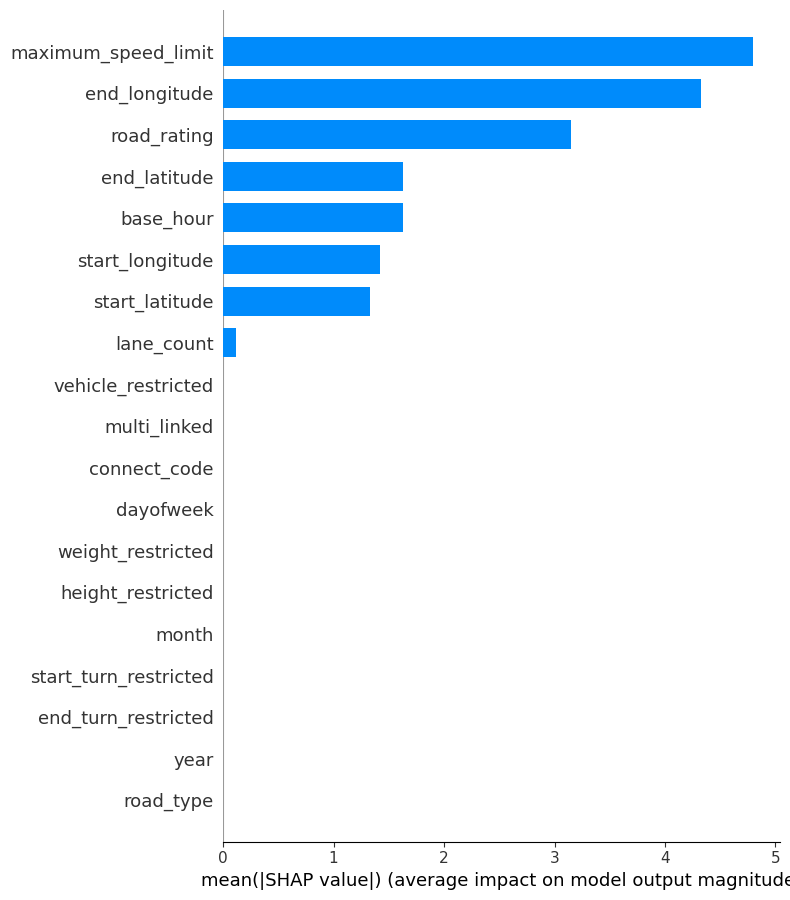

In [24]:
import shap

explainer = shap.Explainer(rf_clf)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test, plot_type='bar') # permutation importance

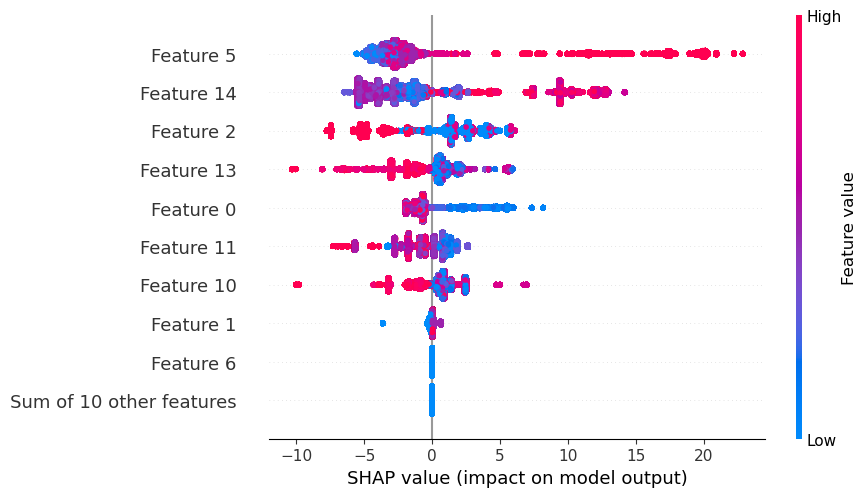

In [25]:
shap.plots.beeswarm(shap_values)

In [26]:
# SHAP 분석을 통해 의미가 있는 Feature만 따로 뽑아서 훈련
X_train, X_test, y_train, y_test = train_test_split(
    X[['maximum_speed_limit','end_latitude','start_latitude','road_rating','start_longitude','base_hour','end_longitude','lane_count']],
    y,
    test_size=0.2,
    random_state=0)

In [27]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, n_jobs=-1, verbose=1, random_state=0)

rf_reg.fit(X_train_std, y_train)

predicted_train = rf_reg.predict(X_train_std)
predicted_test = rf_reg.predict(X_test_std)

print(f"{mean_absolute_percentage_error(predicted_train, y_train)}")
print(f"{mean_absolute_percentage_error(predicted_test, y_test)}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


0.20098176370201384
0.20100248133479878


[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.3s finished


In [28]:
explainer = shap.Explainer(rf_clf)
shap_values = explainer(X_test_std)
shap.summary_plot(shap_values, X_test, plot_type='bar')

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 30.498645, while the model output was 61.435810. If this difference is acceptable you can set check_additivity=False to disable this check.

In [29]:
# XGBoost
import xgboost

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

xgb_model = xgboost.XGBRegressor(n_estimators=100, max_depth=5)
xgb_model.fit(X_train, y_train)

xgb_predicted_train = xgb_model.predict(X_train)
xgb_predicted_test = xgb_model.predict(X_test)

print(f"{mean_absolute_percentage_error(xgb_predicted_train, y_train)}")
print(f"{mean_absolute_percentage_error(xgb_predicted_test, y_test)}")

0.11365148858422532
0.11370190970056993


In [31]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=20,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

> 회귀에서는 XGBoost가 더 적합한 편이다

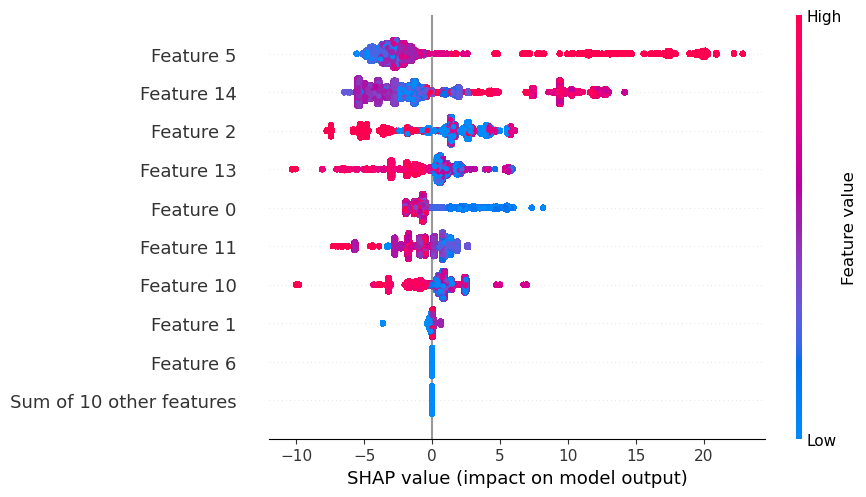

In [32]:
shap.plots.beeswarm(shap_values)